# Question 1 - Alex Bercik (1002128020) and Jaewon Yun (999243322)

# Part A (equations)

We rearrange the given equations and discretise to arrive at the following:
\begin{equation} \label{vxeq}
    v_{x,i+1} = v_{x,i} - \frac{GM_s}{r_i^3}x_{i}\Delta t
\end{equation}

\begin{equation} \label{vyeq}
    v_{y,i+1} = v_{y,i} - \frac{GM_s}{r_i^3}y_{i}\Delta t
\end{equation}

\begin{equation} \label{xeq}
    x_{i+1} = x_i + v_{x,i+1}\Delta t
\end{equation}

\begin{equation} \label{yeq}
    y_{i+1} = y_i + v_{y,i+1}\Delta t
\end{equation}

# Part B (pseudocode)

1. Create empty arrays for x, y, $v_x$, $v_y$, and $r$ of size 10,000

2. Create time array of size 10,000 with timestep 0.0001

3. Set initial $x$, $y$, $v_x$, and $v_y$ values as given

4. Set constants $M_s$ and $G$ as given

5. Loop for all timesteps:

    1. Calculate next index of $v_x$ according to 1st equation using current index of $v_x$ and $x$
    
    2. Calculate next index of $v_y$ according to 2nd equation using current index of $v_y$ and $y$
    
    3. Calculate next index of $x$ according to 3rd equation using next index of $v_x$ and current index of $x$
    
    4. Calculate next index of $y$ according to 4th equation using next index of $v_y$ and current index of $y$
    
    5. Record next index of $r$ according to $r = \sqrt{x^2 + y^2}$

6. Plot $x$ array against $y$ array

7. Calculate initial angular momentum using $\frac{L}{M_p} = xv_y - yv_x$ for first index

8. Calculate final angular momentum using $\frac{L}{M_p}= xv_y - yv_x$ for last index
 
9. Divide final angular momentum by initial angular momentum and print to check percentage of angular momentum conserved

# Part C (code)

In [1]:
#import modules
import numpy as np
import matplotlib.pyplot as plt

>1. Create empty arrays for x, y, $v_x$, and $v_y$ of size 10,000
>2. Create time array of size 10,000 with timestep 0.0001

In [2]:
t=np.linspace(0.0, 1.0,10000) #time array
N=len(t) #save length of time array (total number of timesteps)
x = np.empty(N) # array of position of x
y = np.empty(N) # array of position of y
vx = np.empty(N) # array of x velocities
vy = np.empty(N) # array of y velocities
r=np.empty(N) #array for radius values (will be calculated as r=sqrt(x**2+y**2))

>3\. Set initial $x$, $y$, $v_x$, and $v_y$ values as given

In [3]:
x[0]= 0.47
y[0]= 0.0
vx[0]= 0.0
vy[0]=8.17
r[0]=0.47

>4\. Set constants $M_s$ and $G$ as given

In [4]:
G=39.5
MS=1

> 1. 5\. Loop for all timesteps:
>     1. Calculate next index of $v_x$ according to 1st equation using current index of $v_x$ and $x$ 
>     2. Calculate next index of $v_y$ according to 2nd equation using current index of $v_y$ and $y$
>     3. Calculate next index of $x$ according to 3rd equation using next index of $v_x$ and current index of $x$
>     4. Calculate next index of $y$ according to 4th equation using next index of $v_y$ and current index of $y$
>     5. Record next index of $r$ according to $r = \sqrt{x^2 + y^2}$

In [5]:
# To loop over all timesteps, used saved N. On each loop, update that index for x, y, vx, vy, and r
for k in range(N-1):    
    vx[k+1] = vx[k]-G*x[k]*(r[k]**-3)*(t[k+1]-t[k])
    x[k+1]=x[k]+vx[k+1]*(t[k+1]-t[k])
    vy[k+1] = vy[k]-G*y[k]*(r[k]**-3)*(t[k+1]-t[k])
    y[k+1]=y[k]+vy[k+1]*(t[k+1]-t[k])
    r[k+1]=((x[k+1]**2)+(y[k+1]**2))**(0.5)

> 6\. Plot $x$ array against $y$ array

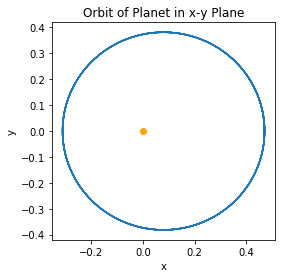

In [6]:
# Plot Results (x vs y, visual representation of orbit from above)
plt.figure()
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Orbit of Planet in x-y Plane')
plt.axis('scaled') # makes sure that the axes follow the same scale
plt.plot(0,0,'o', color='orange') # this shows the position of the sun as an orange dot
plt.show()

We find that our orbit is slightly eliptical, just like the true orbits of planets in our solar system. The orange point represents the Sun, making the eccentricity easier to see.

> 7\. Calculate initial angular momentum using $\frac{L}{M_p} = xv_y - yv_x$ for first index

In [7]:
angmomin = x[0]*vy[0] - y[0]*vx[0]

> 8\. Calculate final angular momentum using $\frac{L}{M_p}= xv_y - yv_x$ for last index

In [8]:
angmomfi = x[0]*vy[0] - y[0]*vx[0]

> 9\. Divide final angular momentum by initial angular momentum and print to check percentage of angular momentum conserved

In [9]:
print(angmomfi/angmomin*100)

100.0


We find that angular momentum is perfectly conserved, demonstrating the stability of this integration method and showing that our result (orbit plotted above) can be trusted.

# Part D (General Relativity)

Our equations now change to the following:
\begin{equation} 
    v_{x,i+1} = v_{x,i} - \frac{GM_s}{r^3} \big{(} 1+\frac{\alpha}{r_i^2} \big{)} x_{i} \Delta t
\end{equation}

\begin{equation} 
    v_{y,i+1} = v_{y,i} - \frac{GM_s}{r^3} \big( 1+\frac{\alpha}{r_i^2} \big) y_{i} \Delta t
\end{equation}

\begin{equation}
    x_{i+1} = x_i + v_{x,i+1}\Delta t
\end{equation}

\begin{equation}
    y_{i+1} = y_i + v_{y,i+1}\Delta t
\end{equation}

The steps 1-6 are identical, and hence will use the same code, only changing the equations used in step 5 as above

In [10]:
#Use same t and N values, reset x, y, vx, vy arrays (just to be clean)
x = np.empty(N) 
vx = np.empty(N)
y = np.empty(N)
vy = np.empty(N)
r=np.empty(N)

# Redefine Initial Values as before, keep G and Ms identical
x[0]= 0.47
y[0]= 0.0
vx[0]= 0.0
vy[0]=8.17
r[0]=0.47
a=0.01 # Here we define the General Relativity Constant

Now we have steps 1-4 complete. Now loop again for all timesteps using the new equations:

In [11]:
# To loop over all timesteps, used saved N. On each loop, update that index for x, y, vx, vy, and r
for k in range(N-1):    
    vx[k+1] = vx[k]-G*x[k]*(r[k]**-3)*(t[k+1]-t[k])*(1+a/(r[k]**2))
    x[k+1]=x[k]+vx[k+1]*(t[k+1]-t[k])
    vy[k+1] = vy[k]-G*y[k]*(r[k]**-3)*(t[k+1]-t[k])*(1+a/(r[k]**2))
    y[k+1]=y[k]+vy[k+1]*(t[k+1]-t[k])
    r[k+1]=((x[k+1]**2)+(y[k+1]**2))**(0.5)

A quick digression from the previous flow, we are going to record the positions of all the perihelions. We will do this computationally by looping through all timesteps and recording when r reaches a local max, i.e. when the local maximum is larger than both the previous and next indices. We will then add this index to a list, then plot the points on the following graph. This is a decently computationally expensive procedure, but becase we have a relatively small number of data points, who cares.

In [12]:
indices = [] # make list to hold parihelion indices
for k in range(N-1): 
    if r[k] > r[k-1] and r[k] > r[k+1]: indices.append(k) #check for local maxima and append to list

As before, plot the results in the x-y plane (step 6)

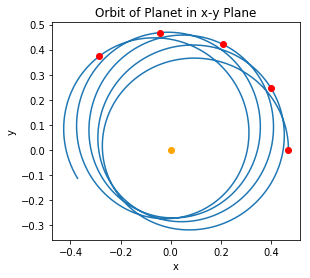

In [13]:
# Plot Results (x vs y, visual representation of orbit from above)
plt.figure()
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Orbit of Planet in x-y Plane')
plt.axis('scaled') # makes sure that the axes follow the same scale
plt.plot(0,0,'o', color='orange') # this shows the position of the sun as an orange dot
plt.plot(x[indices],y[indices],'o', color='red') # plots the perihelion points as red dots
plt.show()

Here we have shown the difference between General and Newtonian gravity. While the Newtonian formulas gave us an orbit that stayed constant, here we see a precession of the orbit due to the additional General Relativity correction. The perihelion points plotted in red show that the orbit moves in time.